In [0]:
import numpy as np
import pandas as pd
houses=pd.read_csv("https://raw.githubusercontent.com/if1015-datascience/material/gh-pages/data/recife.csv",encoding = "ISO-8859-1")

In [2]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart


## Exercício 1: Defina se um imóvel está à venda ou para locação a partir do preço

In [0]:
houses['log_price'] = houses['price'].apply(np.log10)

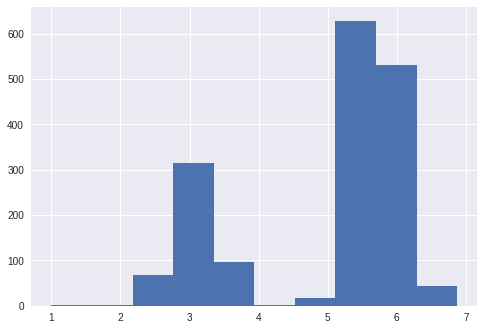

In [4]:
houses[houses['log_price'] > 0]['log_price'].hist()

In [0]:
houses['operation'] = 'sell'

In [0]:
houses.loc[(houses['price'] > 100) & (houses['price'] < 30000),'operation'] = 'rent'

In [7]:
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,log_price,operation
0,1500,-8.059791,-34.889619,4.0,37.0,3.0,3.0,NaN,Boa Vista,Recife,Recife,Pernambuco,apart,3.176091,rent
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,5.518514,sell
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,5.406540,sell
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,5.579784,sell
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,5.477121,sell


## Exercício 2: Calcule a média e mediana de venda do metro quadrado por bairros


In [0]:
houses['price_square_meter'] = houses['price']/houses['area']

In [9]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].mean()

suburb
Aflitos              5057.981293
Apipucos             4953.378876
Areias               2317.073171
Arruda               3599.960047
Boa Viagem           5784.767213
Boa Vista            3499.194950
Campo Grande         4648.761296
Casa Amarela         5351.374665
Casa Forte           6183.445243
CaxangÌÁ             4587.357285
Coelhos              4666.666667
Cohab                1933.333333
Cordeiro             4083.564554
Derby                9043.387168
Encruzilhada         5052.220649
Engenho do Meio      9641.890805
Espinheiro           5231.928476
FundÌ£o              3920.280333
GraÌ¤as              4350.551441
HipÌ_dromo           2502.343750
Ibura                5990.463333
Ilha do Retiro       6055.816062
Imbiribeira          9902.509394
Ipsep                2777.982481
Iputinga             1770.728716
Jaqueira             6742.418062
Jardim SÌ£o Paulo       0.003597
Madalena             5794.175868
Mangabeira           4138.295095
Monteiro             6544.807869
Par

In [11]:
houses[houses['operation']=='sell'].groupby(['suburb']).agg(['mean','median'])['price_square_meter']

,mean,median
suburb,,
Aflitos,5057.981293,4897.959184
Apipucos,4953.378876,4317.180617
Areias,2317.073171,2317.073171
Arruda,3599.960047,4000.000000
Boa Viagem,5784.767213,5351.562500
Boa Vista,3499.194950,3240.384615
Campo Grande,4648.761296,4130.434783
Casa Amarela,5351.374665,5806.451613
Casa Forte,6183.445243,6272.727273


## Exercício 3: Plot as medianas do valor de venda por metro quadrado para cada bairro e análise algum bairro que vc ache que tenha um problema nos dados a partir dos quartis, boxplot, describe etc.

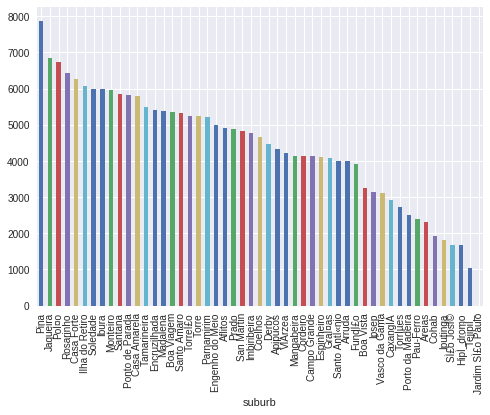

In [12]:
houses[houses['operation']=='sell'].groupby(['suburb'])['price_square_meter'].median().sort_values(ascending=False).plot.bar()

In [13]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')].describe()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,log_price,price_square_meter
count,1.300000e+01,13.000000,13.000000,13.000000,13.000000,10.000000,11.000000,7.0,13.000000,13.000000
mean,1.193943e+06,-8.055494,-34.893257,3.230769,213.623846,1.700000,3.090909,1.0,5.828279,9607.917369
std,1.868665e+06,0.000952,0.002665,1.012739,442.405253,0.823273,0.301511,0.0,0.410753,14132.119159
min,2.500000e+05,-8.056280,-34.895347,1.000000,40.110000,0.000000,3.000000,1.0,5.397940,1948.694030
25%,3.650000e+05,-8.055979,-34.895347,3.000000,51.000000,1.250000,3.000000,1.0,5.562293,5391.304348
50%,6.200000e+05,-8.055979,-34.895347,3.000000,115.000000,2.000000,3.000000,1.0,5.792392,6000.000000
75%,6.900000e+05,-8.054936,-34.890077,4.000000,115.000000,2.000000,3.000000,1.0,5.838849,6606.831214
max,7.000000e+06,-8.052734,-34.889466,5.000000,1682.000000,3.000000,4.000000,1.0,6.845098,56039.215686


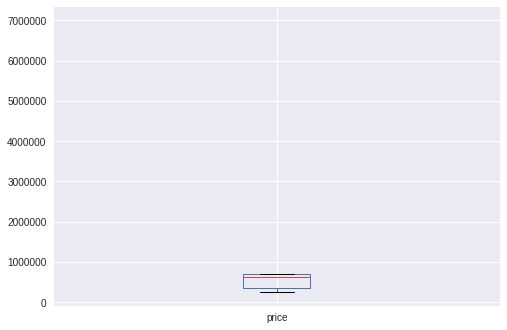

In [14]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')].boxplot(column=['price'])

In [0]:
houses[(houses['suburb'] == 'Soledade') & (houses['operation']=='sell')]

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,log_price,operation,price_square_meter
179,365000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,5.562293,sell,7156.862745
182,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.838849,sell,6000.000000
231,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.792392,sell,5391.304348
400,2858000,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,6.456062,sell,56039.215686
476,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.792392,sell,5391.304348
618,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.838849,sell,6000.000000
628,592139,-8.054936,-34.889466,4.0,51.00,NaN,3.0,NaN,Soledade,Recife,Recife,Pernambuco,apart,5.772424,sell,11610.568627
752,690000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.838849,sell,6000.000000
788,620000,-8.055979,-34.895347,3.0,115.00,2.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.792392,sell,5391.304348
862,261125,-8.055979,-34.895347,4.0,134.00,3.0,3.0,1.0,Soledade,Recife,Recife,Pernambuco,apart,5.416848,sell,1948.694030
